2025-05-03 13:38:07,627 INFO: Closing external client and cleaning up certificates.
Connection closed.
2025-05-03 13:38:07,638 INFO: Initializing external client
2025-05-03 13:38:07,638 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-05-03 13:38:08,569 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1215691
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.69s) 


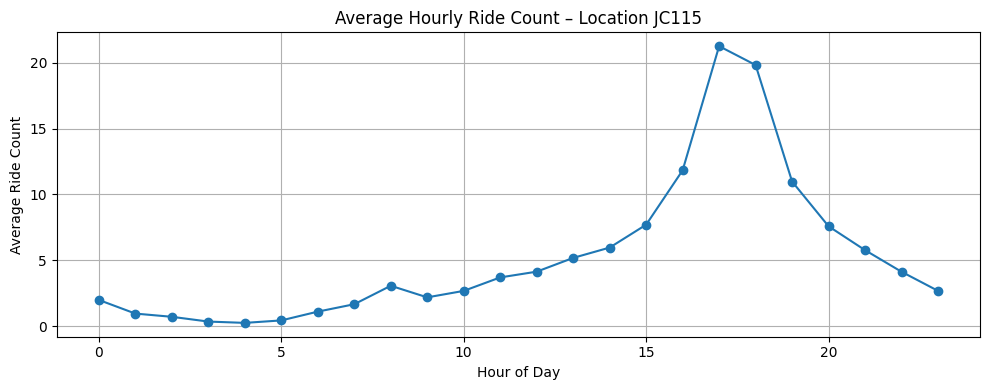

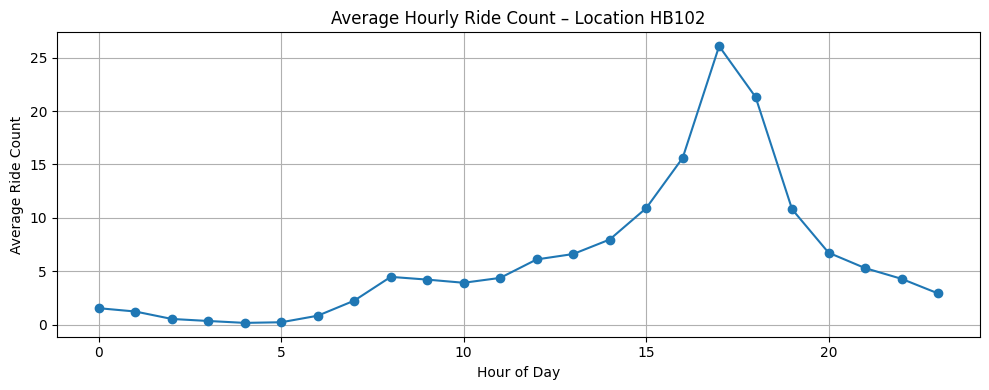

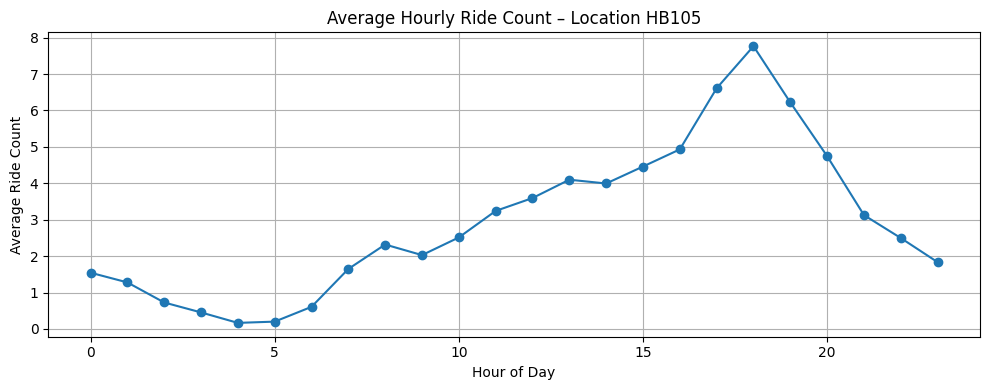

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import hopsworks

project = hopsworks.login()
fs = project.get_feature_store()
fg = fs.get_feature_group(name="citi_bike_features_group", version=1)
df = fg.read()

# Convert pickup_hour to datetime if not already
df["pickup_hour"] = pd.to_datetime(df["pickup_hour"])

# Extract hour and date
df["hour"] = df["pickup_hour"].dt.hour
df["date"] = df["pickup_hour"].dt.date

# Now plot the average trend per hour
location_ids = df["location_id"].unique()
for loc in location_ids:
    loc_df = df[df["location_id"] == loc]
    
    hourly_avg = loc_df.groupby("hour")["target"].mean()
    
    plt.figure(figsize=(10, 4))
    plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
    plt.title(f"Average Hourly Ride Count – Location {loc}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Average Ride Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
